In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "bellabeat"

# **Company and Project Background**

Bellabeat is a wellness tech manufacturer that develops health-focused smart products for women. In the years since its founding in 2013, Bellabeat has achieved significant growth and has the potential to become a larger player in the smart device market. Urška Sršen, cofounder and CPO, believes the analysis of user data for similar products in the market can uncover findings that will help Bellabeat unlock their next level of growth. 

# **Key Questions For Analysis**

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# **Preparation**

To prepare my data and my workspace for analysis, I begin with loading R packages that I believe will be most useful for this analysis. 

In [2]:
#Loading Packages
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




The data I will be using for this project is the public fitbit dataset [found here](https://www.kaggle.com/datasets/arashnic/fitbit). It consists of FitBit Fitness Tracker data gathered from 30 Fitbit users who consented to the use of their personal fitness data. The data includes sleep, step, activity, activity intensity, and weight information on the 30 individuals. 

Some concerns around the dataset include it's size, 30 people is a small sample size. It is also 3rd party data, which rises concerns about data reliability. 

Next, examine the datasets on Google sheets to familiarize myself with the data and check whether the data needs cleaning. The data is stored in long format and does not appear to require significant cleaning. 

I do notice an opportunity to further consolidate some of these files before import, so I join together the hourly activity data into one file by using VLOOKUP to match up the id and date/time for each individual's steps, intensity, and calories into one page. The data is ready for import. 

In [3]:
#Importing Datasets 
dailyactivity <- read.csv("/kaggle/input/bellabeat/dailyActivity_merged.csv")
hourlyactivity <- read.csv("/kaggle/input/bellabeat/hourlyactivity_merged.csv")
sleepday <- read.csv("/kaggle/input/bellabeat/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/bellabeat/weightLogInfo_merged.csv")

To confirm the data was imported correctly, I use the head() function to take a peak at my dataset.

In [4]:
head(hourlyactivity)
head(dailyactivity)
head(sleepday)
head(weight)

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
,<dbl>,<chr>,<int>,<int>,<dbl>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
2,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
3,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
4,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
5,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0
6,1503960366,4/12/2016 5:00:00 AM,48,0,0.000000,0


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


Now that I confirmed my 4 datasets are imported correctly, I will decide which data I want to further explore and analyze. First, I will check the number of unique participants in each dataset.

In [5]:
n_distinct(hourlyactivity$Id)
n_distinct(dailyactivity$Id)
n_distinct(sleepday$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 24

[1] 8

Here, I can see we have data for 33 unique individuals for the hourly and daily activity tables, 24 for the sleep, and only 8 for the weight data. 

Due to the incredibly small sample size of the weight data, I will not be using that data for my analysis. 

I would also like to seperate the date and times of my hourly data in order to analyze trends in the data based on times of day. 

In [6]:
hourlyactivity$ActivityHour=as.POSIXct(hourlyactivity$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourlyactivity$time <- format(hourlyactivity$ActivityHour, format = "%H:%M:%S")
hourlyactivity$date <- format(hourlyactivity$ActivityHour, format = "%m/%d/%y")

# **Exploring and Analyzing Data**


### Examining Whether More Time Spent Sedentary Reduces Total Calorie Burn

Now that I had the chance to review the data, I will start my analysis by exploring relationships between the data that are of interest to me. I would like to start by seeing whether the days that participants spent more time being sedentary resulted in a lower total calorie burn for that day. For that, I will create a scatter plot to visualize the relationship. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


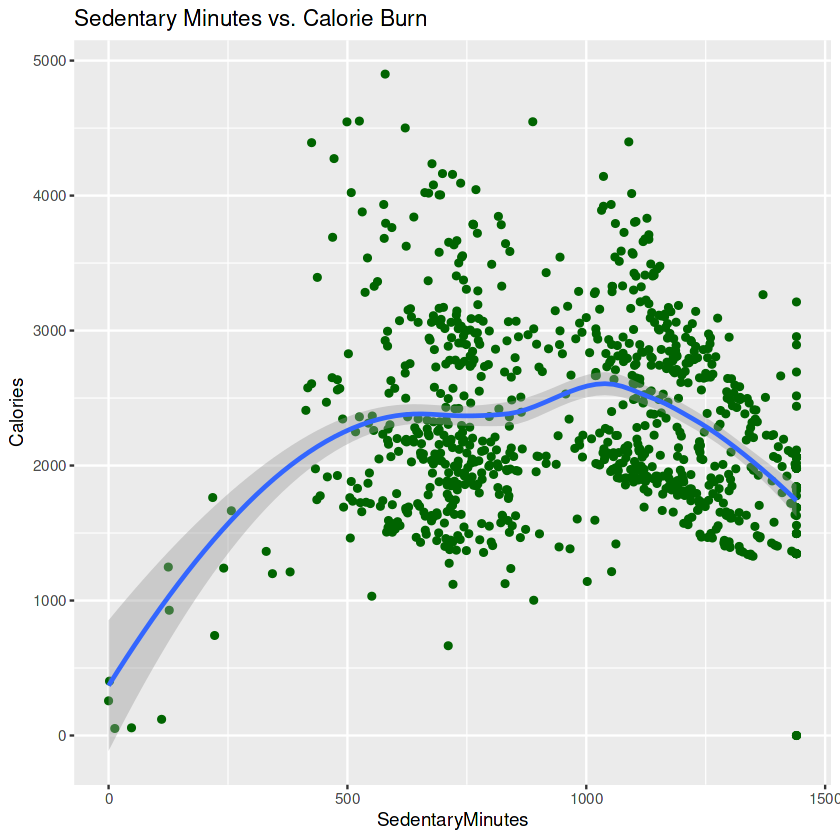

In [7]:
ggplot(data=dailyactivity, aes(x=SedentaryMinutes, y=Calories)) +
geom_point(color="darkgreen") +
geom_smooth()+
labs(title = "Sedentary Minutes vs. Calorie Burn")

This scatterplot has an interesting shape. You can see that there is not a strong correlation between sedentary minutes and calories burned when sedantary minutes are between 500 and 1000. However, when you look further right on the graph when sedentary minutes exceeds 1000 you can see a more clear trend. I want to take a closer look at these points. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


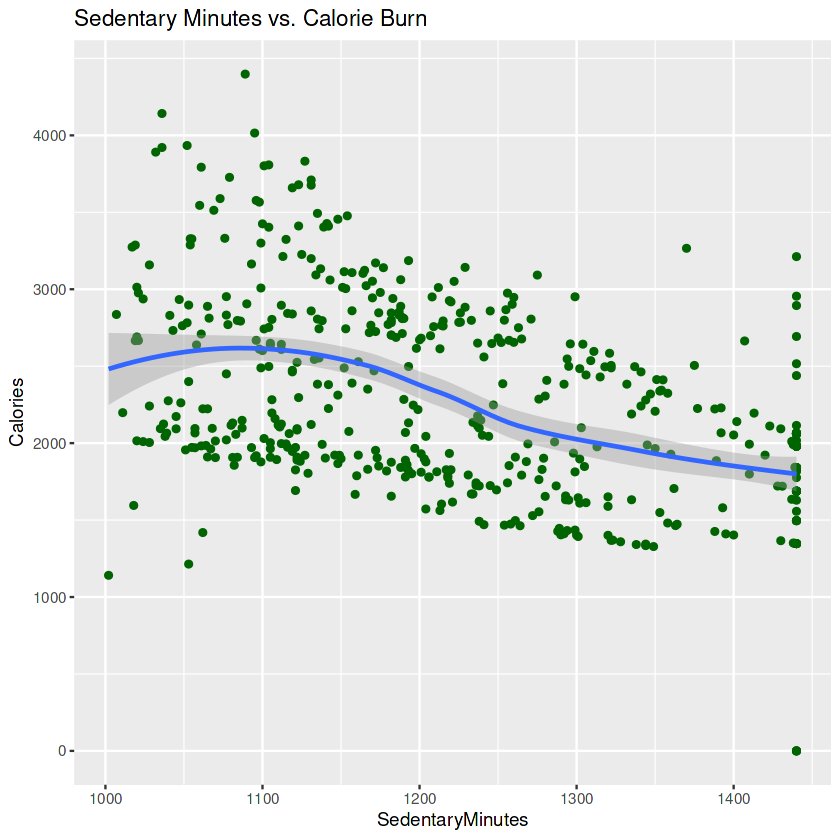

In [8]:
dailyactivity %>%
filter(SedentaryMinutes > 1000)%>%
ggplot(aes(x=SedentaryMinutes, y=Calories)) +
geom_point(color="darkgreen") +
geom_smooth()+
labs(title = "Sedentary Minutes vs. Calorie Burn")

Now that we are focusing on the part of the scatterplot that displayed the strongest relationship, we can see that the number of calories burned does seem to decrease when the number of sedantary minutes increase past 1000 minutes. 

**Based on this information, I would suggest Bellabeat set a reminder for users to get some activity when their time spend sedantary approached 1000 minutes.**



### Examining When People Take The Most Steps 



Next, I'd like to look into trends around the user's activity. For instance, what time of day are people taking the most steps?

Warning message in geom_histogram(stat = "identity", fill = "darkgreen"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


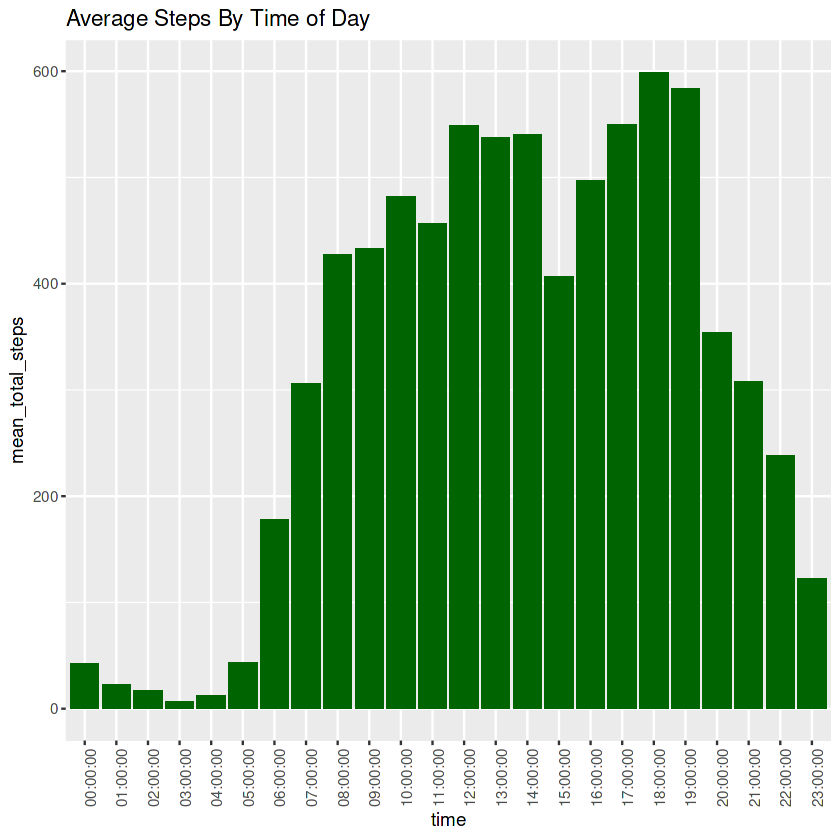

In [9]:
act_byhour <- hourlyactivity%>% 
group_by(time) %>%
drop_na() %>%
summarise(mean_total_steps = mean(StepTotal))

ggplot(data=act_byhour, aes(x=time, y=mean_total_steps)) +
geom_histogram(stat= "identity",fill='darkgreen') +
theme(axis.text.x = element_text(angle = 90))+
labs(title = "Average Steps By Time of Day")


Through this visualization, I can see that people take most of their steps between 8AM and 8PM.

I can also see there is a peak of average steps per hour around 6 and 7 PM. This makes sense because this is around the time when someone will be back home from work and might take a walk, jog, or go to the gym. 

**For Bellabeat, this information shows that if users are falling behind on their daily steps goal, this would be a good time of day to remind them to get more steps in.**

### Examining How Intensity and Calorie Burn is Related

Daily step targets is one goal that fitness wearable users might have. Another goal they may want help with is daily calorie burn. Let's see how activity intensity and calories burned are related. 

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


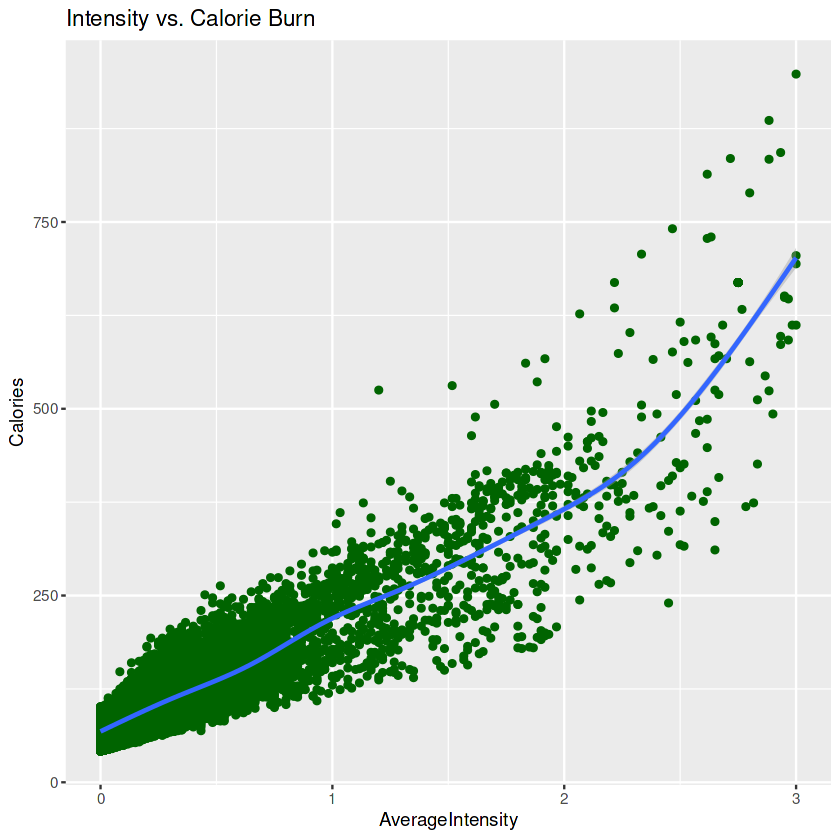

In [10]:
ggplot(data=hourlyactivity, aes(x=AverageIntensity, y=Calories)) +
        geom_point(color="darkgreen") + geom_smooth() + labs(title = "Intensity vs. Calorie Burn")

Here we can see the higher the average intensity of an activity, the more calories the user will burn. **Another suggestion for Bellabeat is to suggest to users to ramp up the intensity of their activity if their goal is to burn more calories.**

# My Conclusions

* There appears to be a relationship between minutes spent sedentary and total daily calories burned when someone is sedentary for over 1000 minutes a day. 
* People tend to take the most steps between the hours of 6PM and 7PM, and take very few steps betwwen 9PM and 6AM. 
* The higher the average intensity of an activity, the more calories an individual will burn during that activity. 

Based on these conclusions, I would suggest Bellabeat to send nudges to their users depending on the user's specified goals. Using data to see common trends in activity, Bellabeat can offer customized notifications with the right timing to keep users on track. 